# Mini Project: Trees and Forests

In this mini-project you'll be introduced to some fundamental concepts in machine learning: **Decision Trees**, **Random Forests**, **Boosting**, and **Bagging**. These techniques play a crucial role in building powerful and versatile machine learning models that can be applied to a wide range of tasks, from classification to regression.

## Decision Trees

Decision Trees are intuitive models that mimic human decision-making processes. Just like answering a series of questions to reach a conclusion, decision trees segment data based on a sequence of if-else questions. They partition the feature space into regions and assign a label to each region. Decision trees are particularly helpful in understanding the decision-making process behind predictions.

## Random Forests

Random Forests are an ensemble method that combines multiple decision trees to create a more robust and accurate model. Each tree in a random forest is trained on a random subset of the data with replacement (bootstrapping), and these trees are allowed to make individual predictions. The final prediction is determined through majority voting (classification) or averaging (regression) of the predictions made by the individual trees. Random Forests are known for their ability to handle noisy data, reduce overfitting, and capture complex relationships.

## Bagging: Bootstrap Aggregating

Bagging, short for Bootstrap Aggregating, is the technique behind Random Forests. It involves training multiple models on bootstrapped subsets of the training data. Bagging reduces the variance of the model by averaging out the noise and errors present in individual models. While Random Forests are a specific application of bagging to decision trees, bagging can also be applied to other base models.

## Boosting

Boosting is another ensemble technique that focuses on building a strong predictor by sequentially training multiple weak learners (often shallow decision trees). Boosting assigns weights to training instances, focusing more on those that the previous models misclassified. This iterative process helps the model correct its mistakes and improve its performance over time. Popular boosting algorithms include AdaBoost, Gradient Boosting, and XGBoost.

In this mini-project, we will:

1. Implement and visualize decision trees using the scikit-learn library.
2. Explore the power of random forests and understand feature importance.
3. Dive into the boosting technique with AdaBoost to enhance model accuracy.

For this mini-project we'll be using the [Breast Cancer Wisconsin (Diagnostic) dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html). First, let's import all the libraries we'll be using.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

Here are your tasks:

1. Use [load_breast_cancer](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html) to load the Breast Cancer Wisconsin dataset as a Pandas dataframe.
2. Split the dataset into training and test sets.
3. Display the first five rows of data and make sure everything looks ok. You should have already explored the data a bit in the logistic regression mini-project so there's no need to conduct further EDA.  

In [2]:
# Load the Breast Cancer Wisconsin dataset
cancerdata = load_breast_cancer()

X = cancerdata.data
y = cancerdata.target

In [3]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

In [4]:
# Display first 5 rows
dfcancer = pd.DataFrame(X, columns=cancerdata.feature_names)
dfcancer['target'] = y

print(dfcancer.head())
print(dfcancer.shape)

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

---

Let's start by diving into decision trees. At a high level, decision trees are a machine learning algorithm used for both classification and regression tasks. They model decisions and decision-making processes by breaking down a complex decision into a sequence of simpler decisions or questions. Each decision leads to one of several possible outcomes, eventually leading to a prediction or classification.

**Decision trees are built out of the following components:**
- **Nodes:** Decision trees consist of nodes. The initial node is the root node, and the final nodes are called leaf nodes.
- **Edges:** Edges connect nodes and represent the decision outcomes.
- **Attributes/Features:** Each node involves a decision based on a specific attribute or feature.
- **Splitting:** At each node, the dataset is partitioned into subsets based on an attribute's values.
- **Leaf Nodes:** These nodes represent the final predicted class or value.

**How Decision Trees Work:**
1. **Selecting the Best Feature:** Decision trees start with the root node and select the feature that best separates the data.
2. **Splitting:** The selected feature is used to split the data into subsets at each internal node.
3. **Repeating:** The process continues recursively for each subset, selecting the best feature at each node.
4. **Leaf Nodes:** The process stops when a certain stopping criterion is met, or when all instances at a node belong to the same class.

**Advantages:**
1. **Interpretability:** Decision trees are easy to understand and interpret. The path from the root to a leaf node can be visualized as a sequence of decisions.
2. **Handles Numerical and Categorical Data:** Decision trees can handle both numerical and categorical data, making them versatile.
3. **Non-Linearity:** They can capture non-linear relationships between features and the target variable.
4. **Feature Importance:** Decision trees provide a measure of feature importance, helping in feature selection.

**Challenges and Considerations:**
1. **Overfitting:** Decision trees can create overly complex models that fit the training data too closely, leading to poor generalization.
2. **Instability:** Small changes in the data can lead to different trees, which can make the model unstable.
3. **Bias towards Majority Class:** In classification tasks, decision trees tend to favor the majority class if classes are imbalanced.

**Improvements:**
1. **Pruning:** Pruning is the process of removing branches that do not improve the model's performance on validation data, reducing overfitting.
2. **Ensemble Methods:** Random Forests and Gradient Boosting Trees are ensemble methods that combine multiple decision trees to improve performance.

There are a number of different metrics used to determine how to split a node in a decision tree. The Gini impurity is a popular criterion used in decision tree algorithms. It measures the degree of impurity in a dataset, where lower values indicate more pure subsets of data. In the context of decision trees, the Gini impurity is used to assess how often a randomly chosen element would be misclassified if it were randomly assigned to a class based on the distribution of class labels in a subset. The Gini impurity ranges between 0 (pure node, all instances belong to a single class) and 0.5 (impure node, instances are evenly distributed across classes).

Here are your tasks:

1. Use Scikit-Learn's [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) to fit a model on the training data.
2. Visualize the resulting tree using [plot_tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html).
3. Iterate on the first two steps by trying different inputs to the decision tree classifier. What happens if you change the max depth? How about the maximum number of lead nodes? From the visualization, make sure you're able to understand how to descend the decision tree to arrive at a prediction.

In [5]:
# Create a Decision Tree model - Attempt 1
dtmodel = DecisionTreeClassifier(max_depth=3, max_leaf_nodes=10)
dtmodel.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, max_leaf_nodes=10)

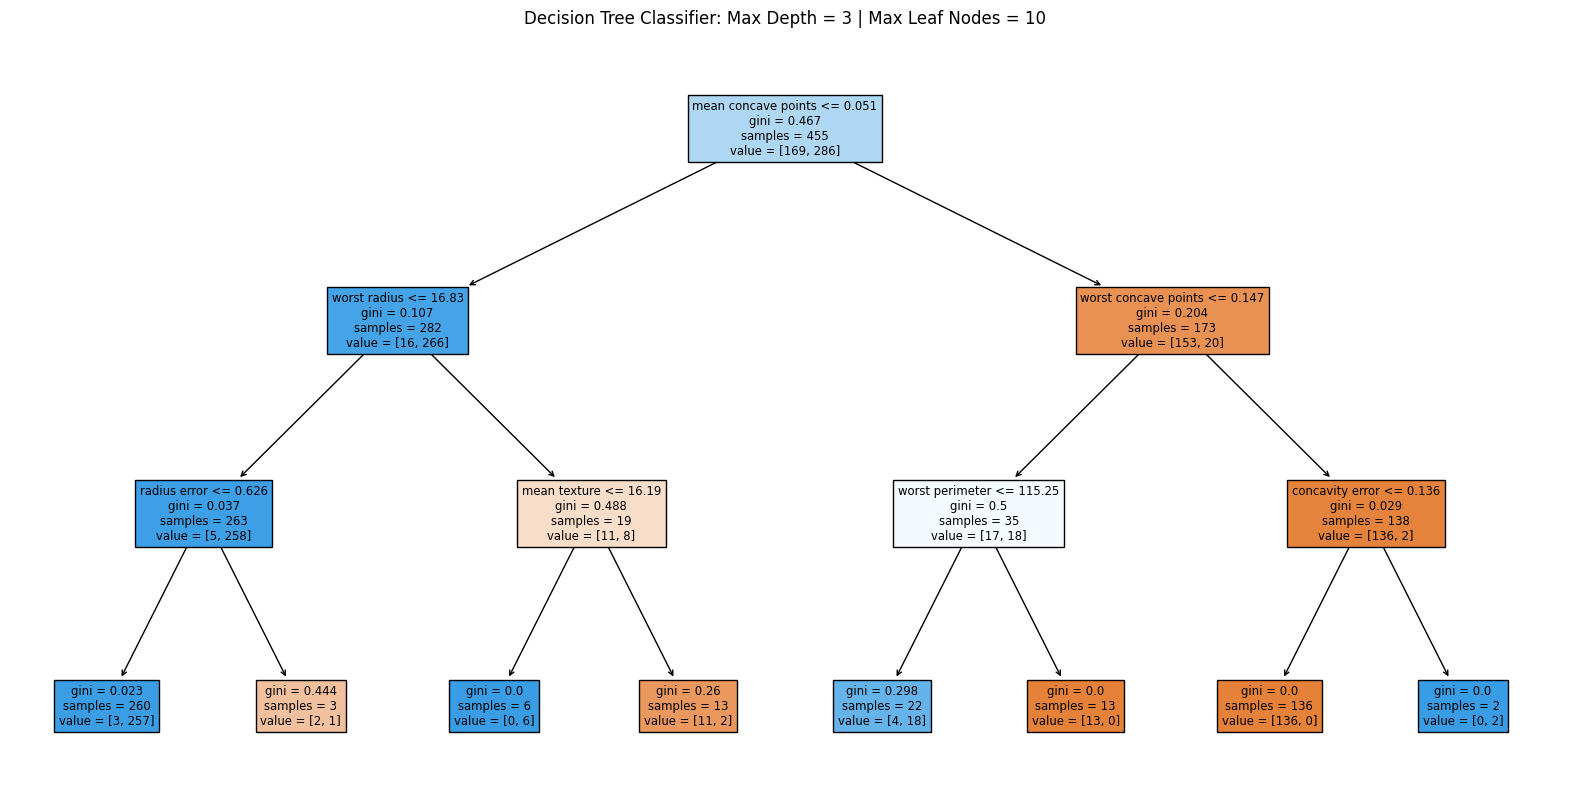

In [6]:
# Visualize the Decision Tree - Attempt 1
plt.figure(figsize=(20,10)) # Make the plot size readable
plot_tree(dtmodel, filled=True, feature_names=cancerdata.feature_names)
plt.title("Decision Tree Classifier: Max Depth = 3 | Max Leaf Nodes = 10")
plt.show()

In [7]:
# Check predictive power and accuracy of this model - Attempt 1
dtmodel_predict = dtmodel.predict(X_test)
print(confusion_matrix(y_test, dtmodel_predict))
print(accuracy_score(y_test, dtmodel_predict))

[[39  4]
 [ 3 68]]
0.9385964912280702




---


> Iterating to create multiple models with various combinations of `max_depth` and `max_leaf_nodes`. Saving results to view in a table.

In [54]:
# Keep track of results to view in a table later
combined_results = []

# Create models with different max_depth and max_leaf_nodes values
depth_values = [3, 5, 7, None]
leaf_values = [10, 20, 30, None]
dtcdict = {} # Create dict of models to view plot_trees later

# Iterate over combinations of max_depth and max_leaf_nodes
for depth in depth_values:
    for leaf in leaf_values:
        dtc = DecisionTreeClassifier(max_depth=depth,
                                     max_leaf_nodes=leaf,
                                     random_state=42)
        dtc.fit(X_train, y_train)
        y_pred_test = dtc.predict(X_test)

        # Show parameters properly in combined_results below
        if depth == None:
            depthtext = 'None'
        else:
            depthtext = depth

        if leaf == None:
            leaftext = 'None'
        else:
            leaftext = leaf

        # Keep track of the models to visualize later
        dtcdict[f'd{depthtext}_l{leaftext}'] = dtc

        # Append results to the combined_results list
        combined_results.append({
            'MaxDepth': depthtext,
            'MaxLeafNodes': leaftext,
            'Test Accuracy': accuracy_score(y_test, y_pred_test)
        })

# Convert results to DataFrame
combined_results_df = pd.DataFrame(combined_results)

In [55]:
# Print the results
print(combined_results_df)

   MaxDepth MaxLeafNodes  Test Accuracy
0         3           10       0.938596
1         3           20       0.938596
2         3           30       0.938596
3         3         None       0.947368
4         5           10       0.947368
5         5           20       0.947368
6         5           30       0.947368
7         5         None       0.947368
8         7           10       0.947368
9         7           20       0.947368
10        7           30       0.947368
11        7         None       0.947368
12     None           10       0.947368
13     None           20       0.947368
14     None           30       0.947368
15     None         None       0.947368




---


> Display visualizations of some of the other model configurations. Observations further below.



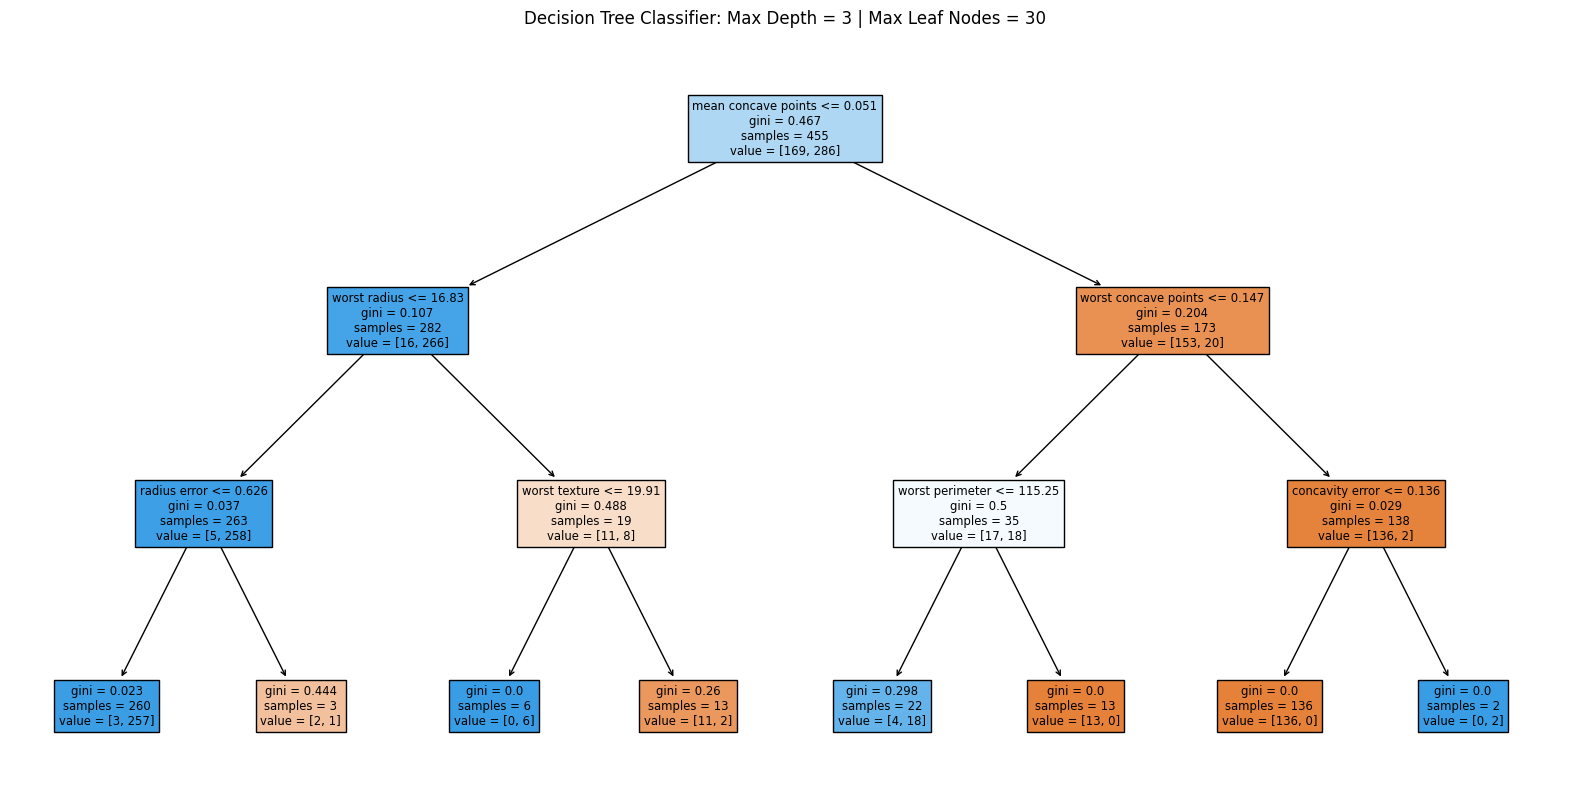

In [10]:
# Visualize max_depth=3, max_leaf_nodes=30
plt.figure(figsize=(20,10)) # Make the plot size readable
plot_tree(dtcdict['d3_l30'], filled=True,
          feature_names=cancerdata.feature_names)
plt.title("Decision Tree Classifier: Max Depth = 3 | Max Leaf Nodes = 30")
plt.show()

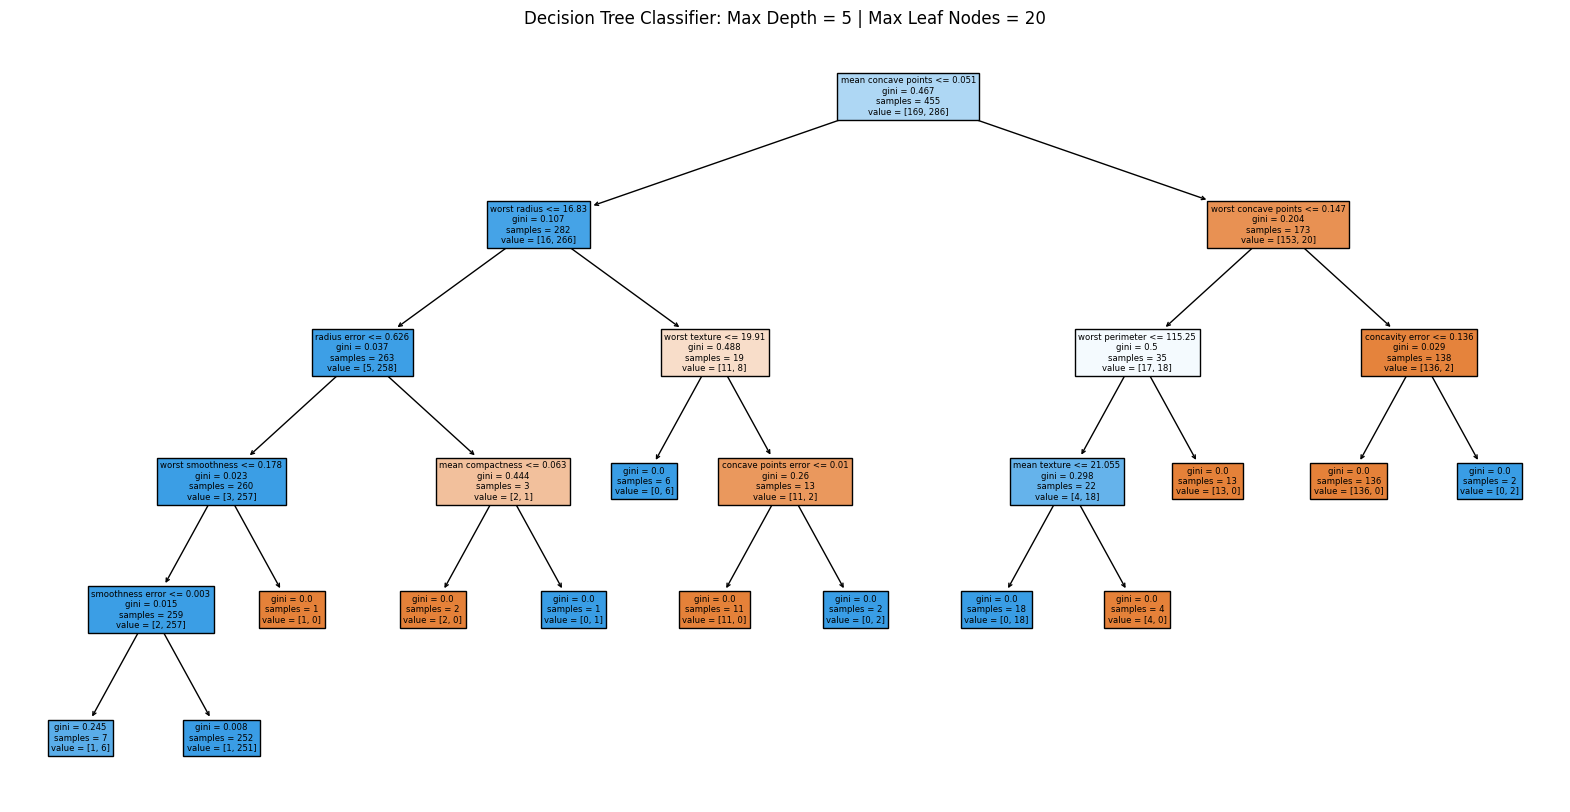

In [11]:
# Visualize max_depth=5, max_leaf_nodes=20
plt.figure(figsize=(20,10)) # Make the plot size readable
plot_tree(dtcdict['d5_l20'], filled=True,
          feature_names=cancerdata.feature_names)
plt.title("Decision Tree Classifier: Max Depth = 5 | Max Leaf Nodes = 20")
plt.show()

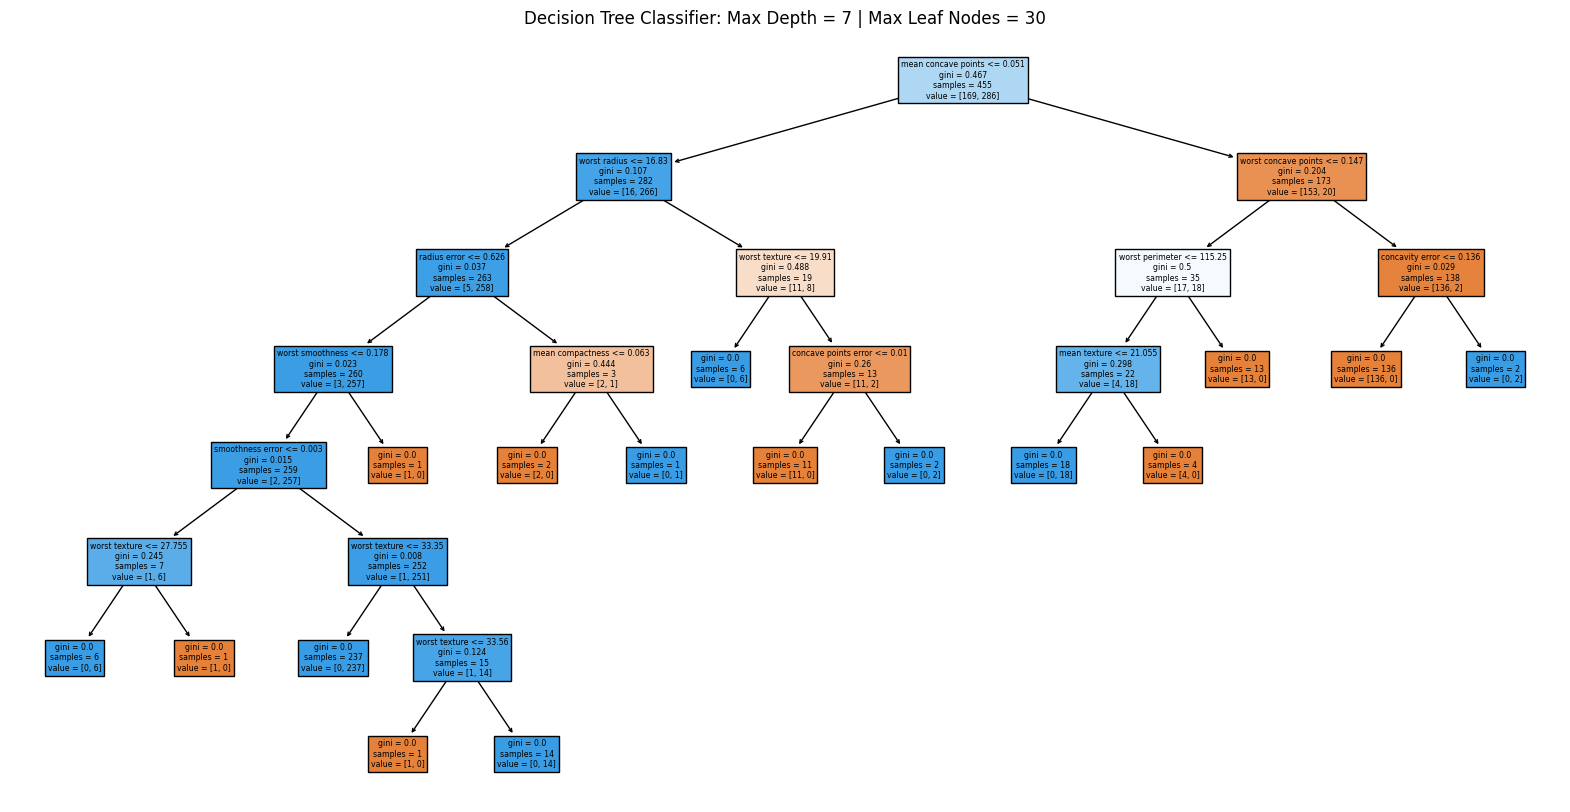

In [12]:
# Visualize max_depth=7, max_leaf_nodes=30
plt.figure(figsize=(20,10)) # Make the plot size readable
plot_tree(dtcdict['d7_l30'], filled=True,
          feature_names=cancerdata.feature_names)
plt.title("Decision Tree Classifier: Max Depth = 7 | Max Leaf Nodes = 30")
plt.show()

> Based on the small chosen sample combinations of `max_depth` and `max_leaf_nodes`, it appears the test accuracy of 94.7% no longer improves after tree depth of 3 and node leaf count of 30. It shows that there is a point of diminishing (or in this case no more) returns with higher depth and node leaf count.

---

Random Forests are an extension of decision trees that leverage the power of ensemble learning to improve predictive accuracy and robustness. Instead of relying on a single decision tree, Random Forests combine multiple decision trees to make more accurate and stable predictions. Let's walk through the steps of going from decision trees to Random Forests:

**Step 1: Building Individual Decision Trees**
1. **Decision Tree Construction:** Start by building multiple individual decision trees. Each tree is trained on a bootstrapped subset of the training data, meaning that each tree sees a slightly different version of the data due to random sampling with replacement.
2. **Feature Selection:** At each node of a decision tree, only a random subset of features is considered for splitting. This introduces randomness and diversity among the trees.

**Step 2: Combining Trees in a Random Forest**
1. **Predictions:** When you need to make a prediction using the Random Forest, each individual tree in the forest makes a prediction.
2. **Majority Voting (Classification) or Averaging (Regression):** In the case of classification, the class that the majority of trees predict becomes the final prediction. In the case of regression, the average of predictions from all trees is taken as the final prediction.

**Benefits of Random Forests:**
1. **Reduced Overfitting:** The ensemble nature of Random Forests helps reduce overfitting. The diversity among the trees reduces the risk of capturing noise in the data.
2. **Feature Importance:** Random Forests can provide an estimate of feature importance by tracking how much each feature contributes to improving the purity of the nodes.
3. **Handles Noisy Data:** Random Forests can handle noisy and irrelevant features more effectively than individual decision trees.
4. **Parallelization:** Training decision trees can be parallelized since they are independent of each other, which speeds up the training process.

Here are your tasks:

1. Use your training data to train a Random Forest using [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html).
2. Extract the feature importances from the trained model.
3. Print the feature importances from largest to smallest.

In [13]:
# Train random forest model
rfmodel = RandomForestClassifier(n_estimators = 100, random_state = 42)
rfmodel.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [14]:
# Extract feature importances
importances = rfmodel.feature_importances_

In [15]:
# Create a DataFrame to display feature names and their importance
df_feature_importances = pd.DataFrame({
    'Feature': cancerdata.feature_names,
    'Importance': importances
}).sort_values(by = 'Importance', ascending = False)

print(df_feature_importances)

                    Feature  Importance
23               worst area    0.153892
27     worst concave points    0.144663
7       mean concave points    0.106210
20             worst radius    0.077987
6            mean concavity    0.068001
22          worst perimeter    0.067115
2            mean perimeter    0.053270
0               mean radius    0.048703
3                 mean area    0.047555
26          worst concavity    0.031802
13               area error    0.022407
21            worst texture    0.021749
25        worst compactness    0.020266
10             radius error    0.020139
5          mean compactness    0.013944
1              mean texture    0.013591
12          perimeter error    0.011303
24         worst smoothness    0.010644
28           worst symmetry    0.010120
16          concavity error    0.009386
4           mean smoothness    0.007285
19  fractal dimension error    0.005321
15        compactness error    0.005253
29  worst fractal dimension    0.005210


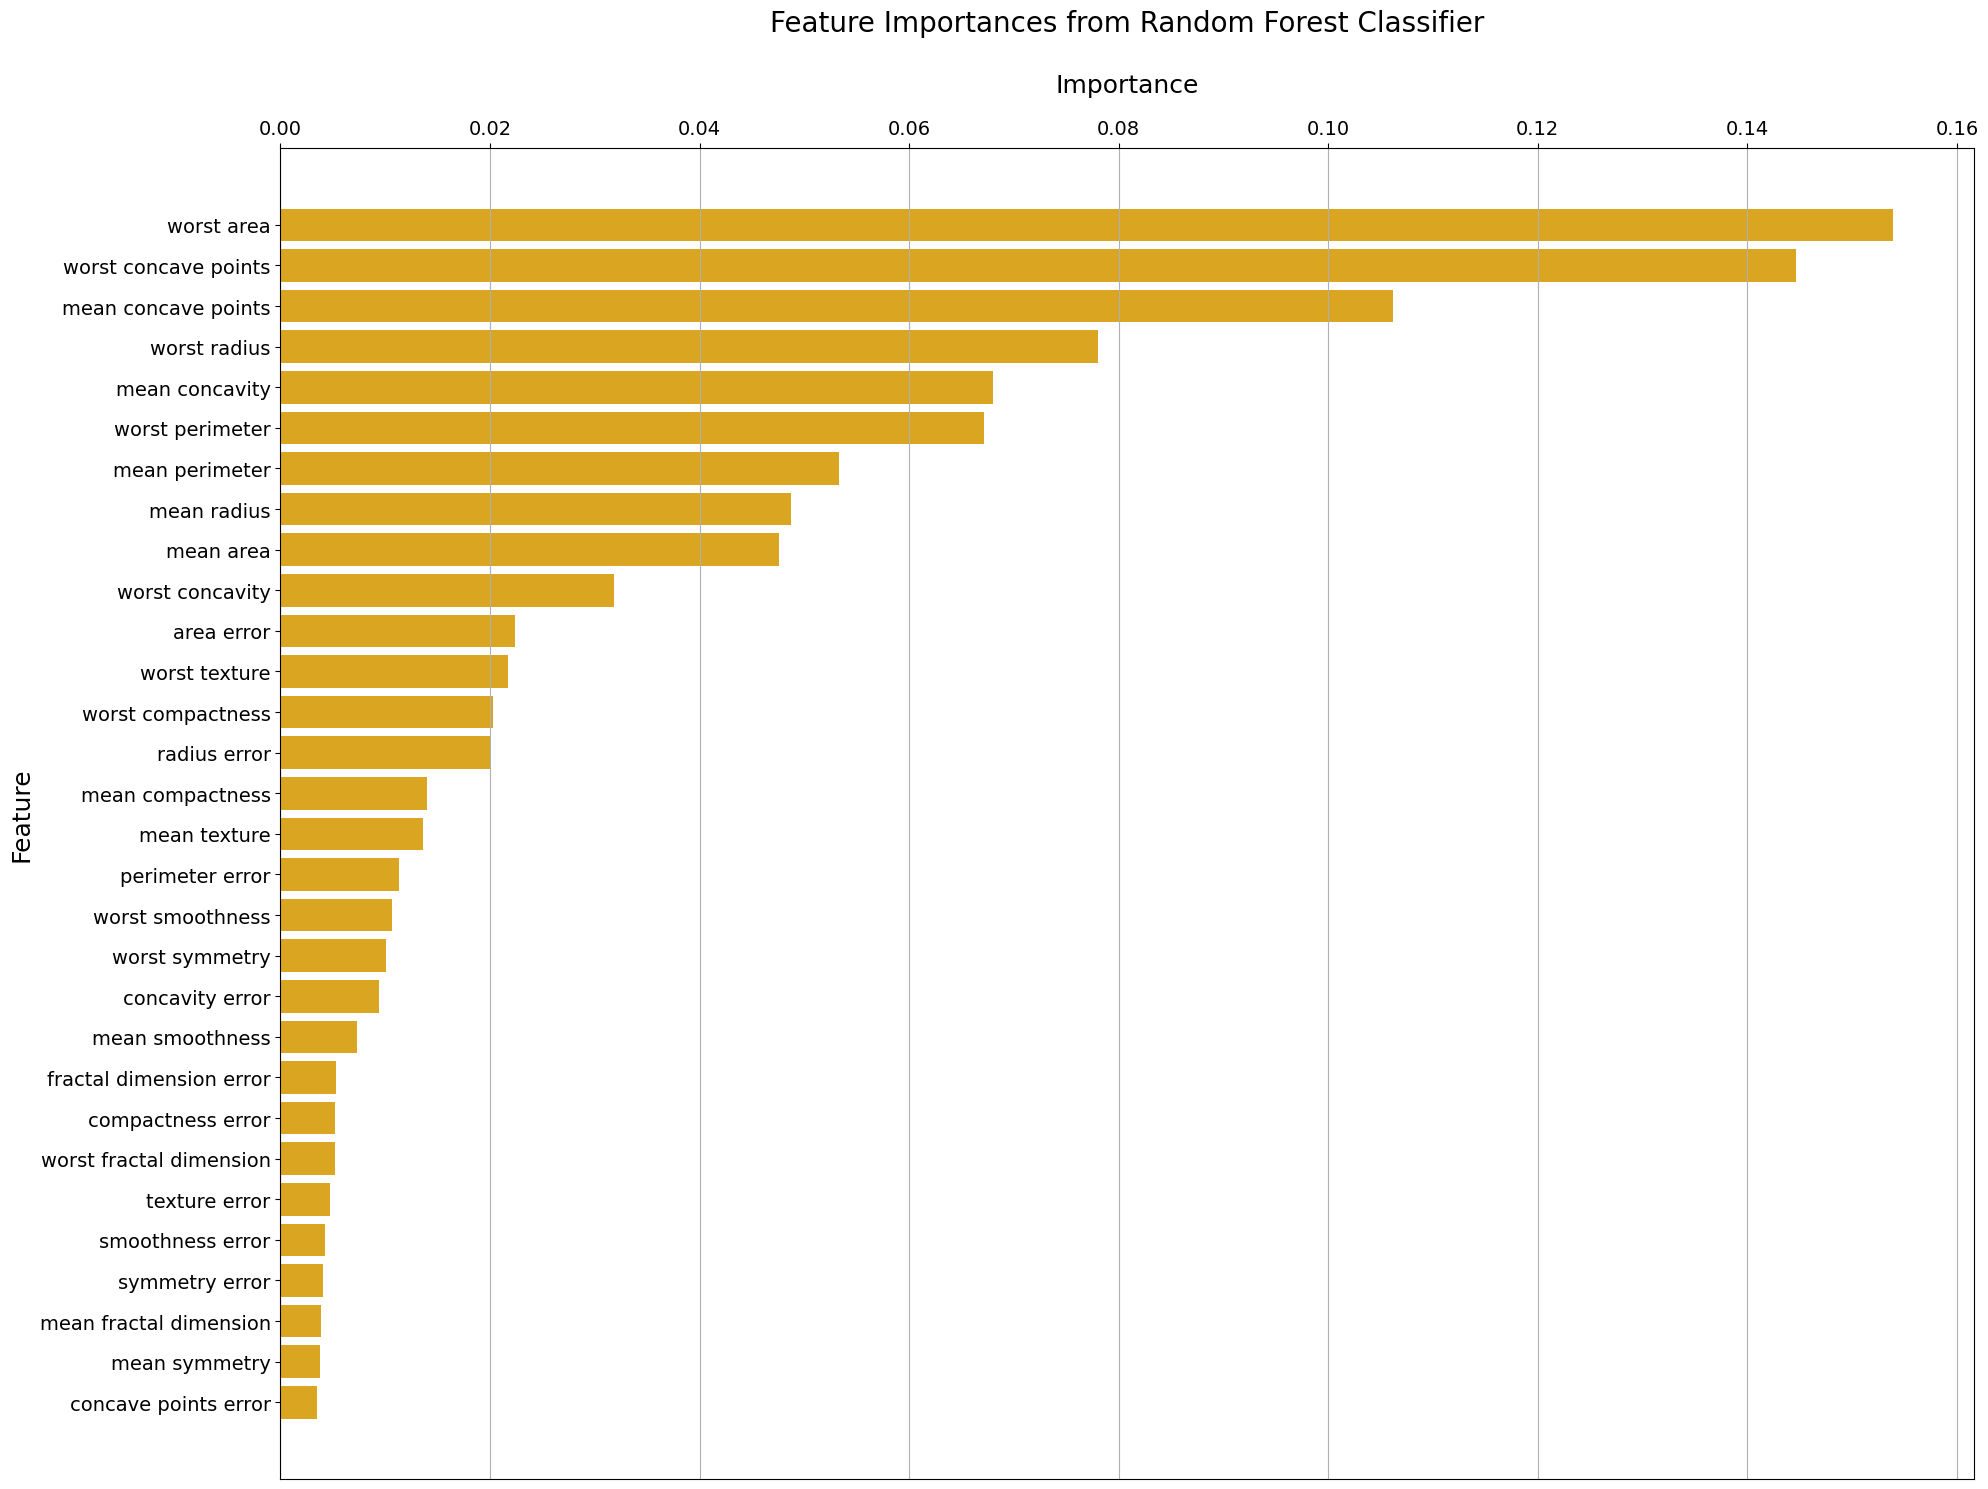

In [16]:
# Plotting feature importances for a better view
plt.figure(figsize = (20, 15))
plt.barh(df_feature_importances['Feature'],
         df_feature_importances['Importance'], color='goldenrod')

# Make the chart a bit more readable
plt.gca().xaxis.set_ticks_position('top')  # Move the xticks to the top
plt.gca().xaxis.set_label_position('top')  # Move the xlabel to the top
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Importance', fontsize=18, labelpad=20) # Pad in some whitespace
plt.ylabel('Feature', fontsize=18)
plt.title('Feature Importances from Random Forest Classifier',
          fontsize=20, pad=30)
plt.gca().invert_yaxis()  # Invert y-axis to show highest importance at the top
plt.grid(True, axis = 'x')
plt.tight_layout()

plt.show()

In [53]:
# Show some model metrics
rfmodel_predict = rfmodel.predict(X_test)
print(confusion_matrix(y_test, rfmodel_predict))
print(accuracy_score(y_test, rfmodel_predict))
print(classification_report(y_test, rfmodel_predict))

[[40  3]
 [ 1 70]]
0.9649122807017544
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



> From the analysis, it appears that features like `worst area`, `worst concave points`, and `mean concave points` contribute the most to the model's decision-making process.

---

AdaBoost, short for Adaptive Boosting, is a powerful ensemble learning technique used primarily for classification tasks. It is designed to enhance the performance of weak learners (typically shallow decision trees) by combining their predictions. AdaBoost focuses on learning from the mistakes of previous models and gives more weight to misclassified instances, allowing subsequent models to correct those mistakes.

Here's an overview of how AdaBoost works:

**Step 1: Building Weak Learners (Base Models)**
1. **Initialization:** Each training instance is initially assigned equal weights.
2. **Training Weak Learners:** A series of weak learners (e.g., shallow decision trees) are trained on the data. Each weak learner tries to minimize the weighted classification error, where the weight of an instance depends on its previous misclassifications. The first weak learner is trained on the original data.

**Step 2: Weighting Instances**
1. **Calculating Error:** The weighted classification error of each weak learner is computed as the sum of weights of misclassified instances.
2. **Updating Weights:** Instances that were misclassified by the previous weak learner are given higher weights, making them more important for subsequent models. Instances that were correctly classified are given lower weights.

**Step 3: Combining Weak Learners**
1. **Predictions and Voting:** The predictions from all weak learners are combined using weighted majority voting. Weights are assigned to each weak learner based on its performance (lower error leads to higher weight).
2. **Final Prediction:** The final prediction is made by taking a weighted majority vote of the weak learners' predictions.

**Benefits of AdaBoost:**
1. **Adaptive Learning:** AdaBoost focuses on instances that were misclassified by previous models, adapting to the complexity of the data.
2. **Improves Weak Models:** Even if individual weak learners perform only slightly better than random guessing, AdaBoost can combine them to create a strong model.
3. **Reduces Overfitting:** The iterative nature of AdaBoost allows it to focus on hard-to-classify instances and improve overall generalization.

Here are your tasks:

1. Build and train an [AdaBoostClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html) on your training data using a decision tree of max depth equal to 1 as your weak learner.
2. Evaluate your decision tree, random forest, and AdaBoost models by applying [accuracy_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) to the test data. Which model performs the best? Experiment by changing the hyperparameters of these models.


In [17]:
# Build and train an AdaBoostClassifier on your training data.
adadtmodel = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                         n_estimators=200)
adadtmodel.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   n_estimators=200)

In [37]:
# Display some model metrics
adadtmodel_predict = adadtmodel.predict(X_test)
print(confusion_matrix(y_test, adadtmodel_predict))
print(accuracy_score(y_test, adadtmodel_predict))
print(classification_report(y_test, adadtmodel_predict))

[[41  2]
 [ 1 70]]
0.9736842105263158
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114





---
#### Further iterations on RandomForest and AdaBoost models

Iterate on Random Forest Model hyperparameters

In [33]:
# Random Forest - Keep track of results to view in a table later
rfcombined_results = []

# Create models with different depth, leaf, and estimator values
rfdepth_values = [3, 7, None]
rfleaf_values = [10, 30, None]
estimator_values = [50, 100, 200]

# Iterate over combinations of max_depth and max_leaf_nodes
for rfdepth in rfdepth_values:
    for rfleaf in rfleaf_values:
        for estimator in estimator_values:
          rf = RandomForestClassifier(max_depth=rfdepth,
                                        max_leaf_nodes=rfleaf,
                                        n_estimators=estimator,
                                        random_state=42)
          rf.fit(X_train, y_train)

          # Show parameters properly in combined_results below
          if rfdepth == None:
              depthtext = 'None'
          else:
              depthtext = rfdepth

          if rfleaf == None:
              leaftext = 'None'
          else:
              leaftext = rfleaf

          #y_pred_train = rf.predict(X_train)
          y_pred_test = rf.predict(X_test)

          # Append results to the combined_results list
          rfcombined_results.append({
              'MaxDepth': depthtext,
              'MaxLeafNodes': leaftext,
              'Num Estimators': estimator,
              'Test Accuracy': accuracy_score(y_test, y_pred_test)
          })

# Convert results to DataFrame
rfcombined_results_df = pd.DataFrame(rfcombined_results)

In [34]:
# Print the results
print(rfcombined_results_df)

   MaxDepth MaxLeafNodes  Num Estimators  Test Accuracy
0         3           10              50       0.964912
1         3           10             100       0.964912
2         3           10             200       0.964912
3         3           30              50       0.964912
4         3           30             100       0.964912
5         3           30             200       0.964912
6         3         None              50       0.964912
7         3         None             100       0.964912
8         3         None             200       0.964912
9         7           10              50       0.964912
10        7           10             100       0.964912
11        7           10             200       0.964912
12        7           30              50       0.964912
13        7           30             100       0.956140
14        7           30             200       0.964912
15        7         None              50       0.964912
16        7         None             100       0

> Interesting how virtually all of these hyperparameter combinations resulted in the same test accuracy score of 96.5%. Slightly more interesting was seeing a combination of 30 max leaf nodes and 100 estimators led to a lower accuracy score of 95.6%. Not sure what is special about that particular combination.

---
Iterate on AdaBoost Model with DT using various combinations of tree depth, learning rate, and number of estimators.

In [49]:
# Ada Decision Tree - Keep track of results to view in a table later
adadtcombined_results = []

# Create models with different depth, leaf, and estimator values
dtdepth_values = [1, 3]
learnrate_values = [0.01, 0.1, 1.0]
estimator_values = [50, 100, 200]

# Iterate over combinations of max_depth and max_leaf_nodes
for dtdepth in dtdepth_values:
    for lr in learnrate_values:
        for adaestimator in estimator_values:
          adadt = AdaBoostClassifier(estimator=DecisionTreeClassifier(
                                        max_depth=dtdepth,
                                        random_state=42),
                                     n_estimators=adaestimator,
                                     learning_rate=lr)

          adadt.fit(X_train, y_train)

          y_pred_test = adadt.predict(X_test)

          # Append results to the combined_results list
          adadtcombined_results.append({
              'MaxDepth': dtdepth,
              'Learning Rate': lr,
              'Num Estimators': adaestimator,
              'Test Accuracy': accuracy_score(y_test, y_pred_test)
          })

# Convert results to DataFrame
adadtcombined_results_df = pd.DataFrame(adadtcombined_results)

In [50]:
# Print the results
print(adadtcombined_results_df)

    MaxDepth  Learning Rate  Num Estimators  Test Accuracy
0          1           0.01              50       0.938596
1          1           0.01             100       0.956140
2          1           0.01             200       0.956140
3          1           0.10              50       0.956140
4          1           0.10             100       0.964912
5          1           0.10             200       0.964912
6          1           1.00              50       0.973684
7          1           1.00             100       0.973684
8          1           1.00             200       0.973684
9          3           0.01              50       0.947368
10         3           0.01             100       0.947368
11         3           0.01             200       0.938596
12         3           0.10              50       0.938596
13         3           0.10             100       0.921053
14         3           0.10             200       0.929825
15         3           1.00              50       0.9649

> In this exercise it seems that minimizing the maximum tree depth to 1, and choosing a learning rate of 1.0 provided the greatest accuracy of 97.4%. It improved by 2.7% from the standalone Decision Tree model of 94.7% accuracy. Raising the tree depth or decreasing the learning rate resulted in lower test accuracy scores.